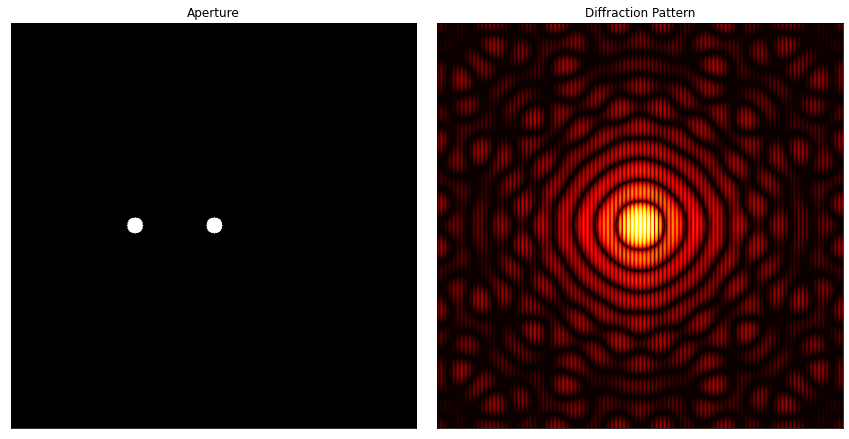

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function Definitions (unchanged)
def draw_hexagon(image, center, radius, intensity=1):
    points = []
    for i in range(6):
        angle = np.deg2rad(60 * i)
        x = int(center[0] + radius * np.cos(angle))
        y = int(center[1] + radius * np.sin(angle))
        points.append((x, y))
    points = np.array(points, np.int32)
    cv2.fillPoly(image, [points], intensity)

def draw_star(image, center, outer_radius, inner_radius, intensity=1):
    points = []
    for i in range(10):
        angle = np.deg2rad(36 * i)
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = int(center[0] + radius * np.cos(angle))
        y = int(center[1] + radius * np.sin(angle))
        points.append((x, y))
    points = np.array(points, np.int32)
    cv2.fillPoly(image, [points], intensity)

def draw_polygon(image, center, radius, sides, intensity=1):
    points = []
    for i in range(sides):
        angle = np.deg2rad(360 / sides * i)
        x = int(center[0] + radius * np.cos(angle))
        y = int(center[1] + radius * np.sin(angle))
        points.append((x, y))
    points = np.array(points, np.int32)
    cv2.fillPoly(image, [points], intensity)

# Parameters
image_size = 512
distance = 100 #55 is the smallest distance between two aperture

# Create a blank canvas
aperture = np.zeros((image_size, image_size), dtype=np.float32)

# Define centers
#the center defines the placement of each shape in relation to the overall image, 
#and in the script, it is used to control where each shape is drawn relative to the image coordinates.
circle_center1 = (image_size // 2 - distance, image_size // 2) #slight away from the center because with respect to the distance between two shapes
circle_center = (image_size // 2, image_size // 2) #exactly at the center of the image
rect_center1 = (image_size // 2, image_size // 2 + distance) #diagonally up left to right
rect_center = (image_size // 2, image_size // 2)
ellipse_center = (image_size // 2, image_size // 2)
hexagon_center = (image_size // 2, image_size // 2)
star_center = (image_size // 2, image_size // 2)
pentagon_center1 = (image_size // 2 + distance, image_size // 2 + distance)
pentagon_center2 = (image_size // 2 + distance, image_size // 2 - distance)
pentagon_center3 = (image_size // 2 - distance, image_size // 2 + distance)
pentagon_center4 = (image_size // 2 - distance, image_size // 2 - distance)
octagon_center = (image_size // 2 + distance, image_size // 2)

# Draw shapes
cv2.circle(aperture, circle_center1, 10, 1, -1)
cv2.circle(aperture, circle_center, 10, 1, -1)
#cv2.rectangle(aperture, (rect_center[0] - 10, rect_center[1] - 30), 
#             (rect_center[0] + 10, rect_center[1] + 30), 1, -1)
#cv2.rectangle(aperture, (rect_center1[0] - 10, rect_center1[1] - 10), 
#              (rect_center1[0] + 10, rect_center1[1] + 10), 1, -1)
#cv2.ellipse(aperture, ellipse_center, (40, 20), 0, 0, 360, 1, -1)
#draw_hexagon(aperture, hexagon_center, 15)
#draw_star(aperture, star_center, 40, 20)
#draw_polygon(aperture, pentagon_center1, 10, 4)
#draw_polygon(aperture, pentagon_center2, 10, 4)
#draw_polygon(aperture, pentagon_center3, 10, 4)
#draw_polygon(aperture, pentagon_center4, 10, 4)
#draw_polygon(aperture, octagon_center, 30, 8)

# Fourier Transform of the aperture
f_transform = np.fft.fft2(aperture)
f_shift = np.fft.fftshift(f_transform)
diffraction_pattern = np.abs(f_shift)**2

# Normalize and adjust diffraction pattern
diffraction_pattern_normalized = diffraction_pattern/np.max(diffraction_pattern)
log_pattern = 20*np.log(diffraction_pattern_normalized+1e-4)  # Log scale with offset

# Log enhance the green channel
green_pattern = np.zeros((image_size, image_size, 3), dtype=np.float32)
green_pattern[..., 1] = diffraction_pattern_normalized
green_logpattern = 20*np.log(green_pattern[..., 1] + 1e-6)  # Log scale with offset for the green channel
green_logpattern_normalized = green_logpattern / np.max(green_logpattern)
green_pattern_final = np.zeros((image_size, image_size, 3), dtype=np.float32)
green_pattern_final[..., 1] = green_logpattern_normalized
green_pattern_final_normalized = np.clip(green_pattern_final, 0, 1)  # Ensure the values are in the correct range

# Plot the aperture and diffraction pattern
plt.figure(figsize=(12, 6))

# Plot the aperture
plt.subplot(121)
plt.imshow(aperture, cmap='gray')
plt.title('Aperture')
plt.xticks([])
plt.yticks([])

# Plot the enhanced diffraction pattern
plt.subplot(122)
plt.imshow(log_pattern, cmap='hot') #colormap types: viridis, plasma, magma, coolwarm, seismic, twilight, hsv
#plt.imshow(green_pattern_final_normalized)
plt.title('Diffraction Pattern')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('circle')
plt.show()